# PyPSA Example Solve

Play around with the Hawaii40 case. This start from the cleaned up case created from another script

In [310]:
import pandas as pd
import  io
import pypsa

In [311]:
# Linear powerflow .lpf() is an approximation of full powerflow. It may make be useful if have convergence issues
USE_LPF = False

In [ ]:
network = pypsa.Network()
network.import_from_csv_folder('csv')
if USE_LPF:
    network.lpf() # linear powerflow - no Q / imaginary flow 
else:
    network.pf() # Full powerflow

INFO:pypsa.network.io:Imported network 'Unnamed Network' has buses, generators, lines, loads, shunt_impedances, transformers
INFO:pypsa.network.power_flow:Performing non-linear load-flow on AC sub-network <pypsa.networks.SubNetwork object at 0x0000023068B6E180> for snapshots Index(['now'], dtype='object', name='snapshot')


{'nodes': {'Bus': <matplotlib.collections.PatchCollection at 0x2306778ca70>},
 'branches': {'Transformer': <matplotlib.collections.LineCollection at 0x2306423e210>,
  'Line': <matplotlib.collections.LineCollection at 0x230677a8d10>},
 'flows': {}}

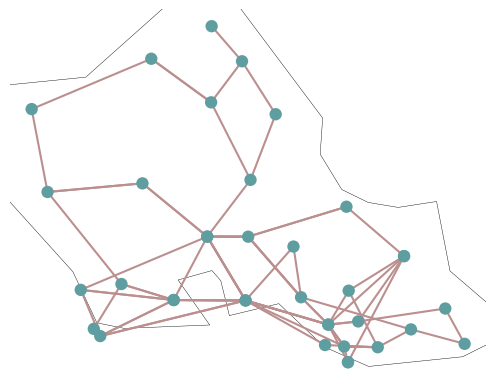

In [199]:
network.plot.map(bus_sizes=5e-5,)

In [200]:
# Branches = lines + transformers
# br = network.branches().loc['Line']
lines = network.lines
lines.columns

Index(['bus0', 'bus1', 'type', 'x', 'r', 'g', 'b', 's_nom', 's_nom_mod',
       's_nom_extendable', 's_nom_min', 's_nom_max', 's_max_pu',
       'capital_cost', 'active', 'build_year', 'lifetime', 'length', 'carrier',
       'terrain_factor', 'num_parallel', 'v_ang_min', 'v_ang_max',
       'sub_network', 'x_pu', 'r_pu', 'g_pu', 'b_pu', 'x_pu_eff', 'r_pu_eff',
       's_nom_opt', 'rateB', 'rateC', 'status', 'original_index', 'v_nom'],
      dtype='object')

In [201]:
# lines = lines.reset_index()
# Sometimes it's easier to index by busses to get the data.
# lines = lines.set_index(['bus0', 'bus1'])

In [202]:
lines.head()

,bus0,bus1,type,x,r,g,b,s_nom,s_nom_mod,s_nom_extendable,...,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt,rateB,rateC,status,original_index,v_nom
Line,,,,,,,,,,,,,,,,,,,,,
L0,1,5,,3.982672,0.647496,0.0,0.000044,232.8,0.0,False,...,0.0,0.846,0.000209,0.000034,0.0,232.8,232.8,1.0,3,138.0
L1,1,5,,3.982672,0.647496,0.0,0.000044,232.8,0.0,False,...,0.0,0.846,0.000209,0.000034,0.0,232.8,232.8,1.0,4,138.0
L2,1,22,,4.603506,0.712246,0.0,0.000032,177.8,0.0,False,...,0.0,0.605,0.000242,0.000037,0.0,177.8,177.8,1.0,5,138.0
L3,1,25,,3.008571,0.550372,0.0,0.000040,217.0,0.0,False,...,0.0,0.771,0.000158,0.000029,0.0,217.0,217.0,1.0,6,138.0
L4,1,25,,3.008571,0.550372,0.0,0.000040,217.0,0.0,False,...,0.0,0.771,0.000158,0.000029,0.0,217.0,217.0,1.0,7,138.0


In [203]:
# All details for L556 | 22 - 37 | WAIPAHU138 - KAHE138
lines.loc['L56']

bus0                      22
bus1                      37
type                        
x                    7.77776
r                   1.298801
g                        0.0
b                   0.000058
s_nom                  292.9
s_nom_mod                0.0
s_nom_extendable       False
s_nom_min                0.0
s_nom_max                inf
s_max_pu                 1.0
capital_cost             0.0
active                  True
build_year                 0
lifetime                 inf
length                   0.0
carrier                   AC
terrain_factor           1.0
num_parallel             1.0
v_ang_min                0.0
v_ang_max                0.0
sub_network                0
x_pu                0.000408
r_pu                0.000068
g_pu                     0.0
b_pu                   1.104
x_pu_eff            0.000408
r_pu_eff            0.000068
s_nom_opt                0.0
rateB                  292.9
rateC                  292.9
status                   1.0
original_index

In [204]:
# But for now we care deeplly about the rating
# rateA <-> s_nom
# rateB, rateC are typically emergency ratings. Right now we just care about one rating - s_nom 
lines.loc['L56']['s_nom']

np.float64(292.9)

In [205]:
# Get all the ratings
lines[['s_nom']]

,s_nom
Line,
L0,232.8
L1,232.8
L2,177.8
L3,217.0
L4,217.0
...,...
L72,60.0
L73,38.0
L74,84.3


In [206]:
# When we solve the case, the results are stored in the line_t dataframe. 
# real power MW for each line at p0=bus0. The flow is the same at p1=bus1 
network.lines_t['p0']

,L0,L1,L2,L3,L4,L5,L6,L7,L8,L9,...,L67,L68,L69,L70,L71,L72,L73,L74,L75,L76
snapshot,,,,,,,,,,,,,,,,,,,,,
now,79.168558,79.168558,-22.449716,-66.694086,-66.694086,-61.553733,-61.553733,37.115632,45.596813,45.596813,...,53.65,36.556723,36.556723,33.366553,12.794867,32.418296,23.08446,-18.661974,-18.661974,24.980921


In [207]:
# Get the flow on one line. p0 is the active power at bus0
# Note that the solved powerflow is much lower than the max capability of the line
network.lines_t['p0'][['L56']]

,L56
snapshot,
now,-46.323237


In [208]:
# We don't care about voltage magnitude especially with a linear power flow where everything is 1.0
# But if we want to get bus voltages you would use this command
network.buses_t['v_mag_pu']

Bus,1,2,3,4,5,6,7,8,9,10,...,28,29,30,31,32,33,34,35,36,37
snapshot,,,,,,,,,,,,,,,,,,,,,
now,0.995303,1.0,0.987812,0.985289,0.991353,0.986419,0.9859,0.981088,0.989437,0.986062,...,1.0,0.993706,0.995275,0.998003,0.990158,1.0,1.0,1.0,1.0,1.0


In [234]:
# Get the flow on one line. q0 is the imaginary power at bus0
# Q is not available for lpf() - it's only available for the pf() solution
if not USE_LPF:
    q = network.lines_t['q0'].loc['now']['L56']
    print('foo')
    print(f"L56 Q: {q:.4f}")

foo
L56 Q: 0.9975


## Check all ratings

Typically we want to check the flows against all ratings to see if anything is overloaded. 
The only tricky part here is massaging the data.

In [275]:
# pivot to tall dataframe
# use abs() because direction doesn't matter
# and ratings are typically rounded to nearest int
p0 = network.lines_t['p0'].loc['now']
p0_df = pd.DataFrame(p0_now, columns=['p0_now'])
p0_df = p0_df['p0_now'].map(abs).round(0)
p0_df.head()

L0    79.0
L1    79.0
L2    22.0
L3    67.0
L4    67.0
Name: p0_now, dtype: float64

In [276]:
s_nom = network.lines[['s_nom']]
s_nom.head()

,s_nom
Line,
L0,232.8
L1,232.8
L2,177.8
L3,217.0
L4,217.0


In [278]:
df = pd.merge(s_nom, p0_df, how='inner', left_index=True, right_index=True)
df.head()

,s_nom,p0_now
L0,232.8,79.0
L1,232.8,79.0
L2,177.8,22.0
L3,217.0,67.0
L4,217.0,67.0


In [282]:
df['loading_frac'] = (1 - (df['s_nom'] - df['p0_now']) / df['s_nom']).round(2)
df.head()

,s_nom,p0_now,loading_frac
L0,232.8,79.0,0.34
L1,232.8,79.0,0.34
L2,177.8,22.0,0.12
L3,217.0,67.0,0.31
L4,217.0,67.0,0.31


In [287]:
df.sort_values(by='loading_frac', ascending=False)

,s_nom,p0_now,loading_frac
L67,67.5,54.0,0.80
L50,100.3,78.0,0.78
L48,100.3,78.0,0.78
L51,100.3,78.0,0.78
L49,100.3,78.0,0.78
...,...,...,...
L60,65.6,4.0,0.06
L59,65.6,4.0,0.06
L52,85.8,3.0,0.03
L57,74.4,0.0,0.00


## Take some outages and solve

Let's take an outage on 
```
L48 | 19 - 23 | PEARL CITY69 - WAIPAHU69 #1
```

Then check to see if the parallel lines, or any other line, overloads.
```
L49 | 19 - 23 | PEARL CITY69 - WAIPAHU69 #2
L50 | 19 - 23 | PEARL CITY69 - WAIPAHU69 #3
L51 | 19 - 23 | PEARL CITY69 - WAIPAHU69 #4
```

In [ ]:
# If we run lpf() again, the old results stick around L48 which is inactive.
# We can start from new and completely discard the old results gone
network = pypsa.Network()
network.import_from_csv_folder('csv')

INFO:pypsa.network.io:Imported network 'Unnamed Network' has buses, generators, lines, loads, shunt_impedances, transformers


In [343]:
# Disable one of the lines
network.lines.loc["L48", "active"] = False
# df() has trouble converging after outage to use LPF instead
network.lpf() # 
# network.lines_t['p0'].loc['now'][['L48', 'L49', 'L50', 'L51']]

INFO:pypsa.network.power_flow:Performing linear load-flow on AC sub-network <pypsa.networks.SubNetwork object at 0x00000230640076E0> for snapshot(s) Index(['now'], dtype='object', name='snapshot')


In [347]:
p0 = network.lines_t['p0'].loc['now']
p0.name = 'p0_now'
p0_df = pd.DataFrame(p0)
p0_df = p0_df['p0_now'].map(abs).round(0)

df = pd.merge(s_nom, p0_df, how='inner', left_index=True, right_index=True)
df['loading_frac'] = (1 - (df['s_nom'] - df['p0_now']) / df['s_nom']).round(2)
df.sort_values(by='loading_frac', ascending=False).head()

,s_nom,p0_now,loading_frac
L50,100.3,135.0,1.35
L51,100.3,135.0,1.35
L49,100.3,98.0,0.98
L67,67.5,54.0,0.80
L48,100.3,77.0,0.77


In [348]:
# Now disabled another circuit - something will break for sure
network.lines.loc["L49", "active"] = False
network.lpf() # 
# Not that L49 will have the value from the previous solve even though it is no longer valid

INFO:pypsa.network.power_flow:Performing linear load-flow on AC sub-network <pypsa.networks.SubNetwork object at 0x00000230640A7E60> for snapshot(s) Index(['now'], dtype='object', name='snapshot')


In [349]:
p0 = network.lines_t['p0'].loc['now']
p0.name = 'p0_now'
p0_df = pd.DataFrame(p0)
p0_df = p0_df['p0_now'].map(abs).round(0)

df = pd.merge(s_nom, p0_df, how='inner', left_index=True, right_index=True)
df['loading_frac'] = (1 - (df['s_nom'] - df['p0_now']) / df['s_nom']).round(2)
df.sort_values(by='loading_frac', ascending=False).head()

,s_nom,p0_now,loading_frac
L50,100.3,135.0,1.35
L51,100.3,135.0,1.35
L49,100.3,98.0,0.98
L67,67.5,54.0,0.80
L48,100.3,77.0,0.77
